In [1]:
import os
%pylab inline
import numpy as np
import hashlib

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
import os 
import hashlib
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.metrics import accuracy_score
import seaborn as sns 

import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, BatchNormalization, Dropout, Softmax
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.losses import CategoricalCrossentropy
from qkeras.utils import _add_supported_quantized_objects
from tensorflow.keras.models import load_model
from qkeras.utils import _add_supported_quantized_objects

2024-12-02 11:34:08.988108: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-12-02 11:34:09.048091: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-02 11:34:09.049961: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-12-02 11:34:09.049972: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudar

### Compare with scan Notebooks 

In [61]:
save_plots = True

In [62]:
all_window_sizes = list(range(50, 701, 50)) + [770]
all_window_start_locations = list(range(0, 351, 50))


In [63]:
checkpoint_dir_th = '../checkpoints/MF'
fidelity_mf = np.load(os.path.join(checkpoint_dir_th, '_MF_scan_window_size_and_location_window_size_0_770.npz'))
fidelity_mf = fidelity_mf['fidelity']
fidelity_mf[fidelity_mf == -1] = np.nan

In [64]:
checkpoint_dir_th = '../checkpoints/TH'
fidelity_th = np.load(os.path.join(checkpoint_dir_th, '_TH_scan_window_size_and_location_window_size_0_770.npz'))
fidelity_th = fidelity_th['fidelity']
fidelity_th[fidelity_th == -1] = np.nan

In [65]:
checkpoint_dir4 = '../checkpoints/scan_window_location_and_size_h4'
data1 = np.load(os.path.join(checkpoint_dir4, '_2-layer_scan_window_size_and_location_window_size_0_770.npz'))
fidelity_nn4 = data1['accuracy']
fidelity_nn4[fidelity_nn4 == -1] = np.nan
fidelity_nn4[fidelity_nn4 == 0] = np.nan

fidelity_nn4 = fidelity_nn4*2-1
fidelity_nn4 = 1/2+(0.5*fidelity_nn4)

In [66]:
checkpoint_dir = '../checkpoints/scan_window_location_and_size_model_800x4x1_ternary'
data1 = np.load(os.path.join(checkpoint_dir, '_2-layer_scan_window_size_and_location_window_size_0_770.npz'))
fidelity_800x4x1_ternary = data1['accuracy']
fidelity_800x4x1_ternary[fidelity_800x4x1_ternary == -1] = np.nan

fidelity_800x4x1_ternary = fidelity_800x4x1_ternary*2-1
fidelity_800x4x1_ternary = 1/2+(0.5*fidelity_800x4x1_ternary)

In [67]:
checkpoint_dir = '../checkpoints/scan_window_location_and_size_model_800x4x1_3b'
data1 = np.load(os.path.join(checkpoint_dir, '_2-layer_scan_window_size_and_location_window_size_0_770.npz'))
fidelity_800x4x1_3b = data1['accuracy']
fidelity_800x4x1_3b[fidelity_800x4x1_3b == -1] = np.nan

fidelity_800x4x1_3b = fidelity_800x4x1_3b*2-1
fidelity_800x4x1_3b = 1/2+(0.5*fidelity_800x4x1_3b)

In [68]:
checkpoint_dir = '../checkpoints/scan_window_location_and_size_model_800x4x1_6b'
data1 = np.load(os.path.join(checkpoint_dir, '_2-layer_scan_window_size_and_location_window_size_0_770.npz'))
fidelity_800x4x1_6b = data1['accuracy']
fidelity_800x4x1_6b[fidelity_800x4x1_6b == -1] = np.nan

fidelity_800x4x1_6b = fidelity_800x4x1_6b*2-1
fidelity_800x4x1_6b = 1/2+(0.5*fidelity_800x4x1_6b)

In [69]:
checkpoint_dir = '../checkpoints/scan_window_location_and_size_model_800x64x1'
data1 = np.load(os.path.join(checkpoint_dir, '_2-layer_scan_window_size_and_location_window_size_0_770.npz'))
fidelity_800x64x1 = data1['accuracy']
fidelity_800x64x1[fidelity_800x64x1 == -1] = np.nan

fidelity_800x64x1 = fidelity_800x64x1*2-1
fidelity_800x64x1 = 1/2+(0.5*fidelity_800x64x1)

Text(0.5, 1.0, 'Window Size vs Start Location on Fidelity')

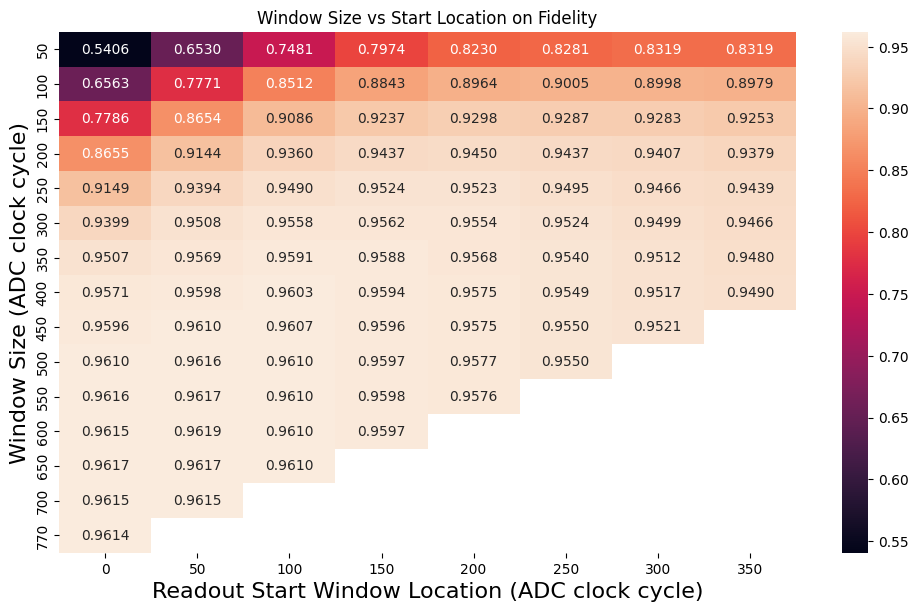

In [70]:
plt.figure(figsize=(10, 6))
sns.heatmap(fidelity_nn4, annot=True, fmt='.4f', yticklabels=all_window_sizes, xticklabels=all_window_start_locations)
# plt.xlabel('Window Start Location', size=16)
plt.xlabel('Readout Start Window Location (ADC clock cycle)', size=16)
plt.ylabel('Window Size (ADC clock cycle)', size=16)
plt.tight_layout()
if save_plots: plt.savefig(os.path.join('../paper_plots/', 'window_size_vs_start_location.png'))
if save_plots: plt.savefig(os.path.join('../paper_plots/', 'window_size_vs_start_location.pdf'))
plt.title('Window Size vs Start Location on Fidelity')

In [71]:
# checkpoint_dir8 = '../checkpoints/scan_window_location_and_size_h8'
# data1 = np.load(os.path.join(checkpoint_dir8, '_2-layer_h-8_scan_window_size_and_location_window_size_0_350.npz'))
# fidelity_nn8 = data1['fidelity']
# fidelity_nn8[fidelity_nn8 == -1] = np.nan

In [72]:
checkpoint_dir14 = '../checkpoints/scan_window_location_and_size_h14'
data1 = np.load(os.path.join(checkpoint_dir14, '_2-layer_scan_window_size_and_location.npz'))
data2 = np.load(os.path.join(checkpoint_dir14, '_2-layer_scan_window_size_and_location_450_700.npz'))
data3 = np.load(os.path.join(checkpoint_dir14, '_2-layer_scan_window_size_and_location_window_size_770.npz'))
fidelity_nn14 = np.concatenate((data1['fidelity'], data2['fidelity'], data3['fidelity']), 0)
fidelity_nn14[fidelity_nn14 == -1] = np.nan

In [73]:
checkpoint_dir64 = '../checkpoints/scan_window_location_and_size_h64/'
fidelity_nn64 = np.load(os.path.join(checkpoint_dir64, '_2-layer_scan_window_size_and_location_window_size_0_770.npz'))
fidelity_nn64 = fidelity_nn64['accuracy']
fidelity_nn64[fidelity_nn64 == -1] = np.nan

In [74]:
readout_loc_list = list(range(0, 351, 50))
print(readout_loc_list)
print(len(readout_loc_list))

[0, 50, 100, 150, 200, 250, 300, 350]
8


In [75]:
fidelity_nn4[7].shape

(8,)

Text(0.5, 1.0, 'NN (4 hidden) Hidden Moving Window 400 CLK)')

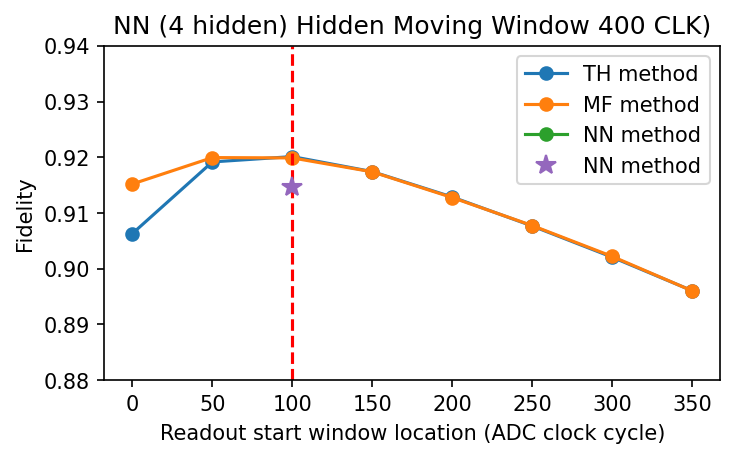

In [76]:
idx = 7

plt.figure(figsize = (5,3), dpi = 150)
# figure(figsize = (4,3), dpi = 150)
# plot(readout_loc_list, all_fidelity_train, 'o', color = 'C0',label = 'TH method_Train')
plt.plot(readout_loc_list, fidelity_th[idx], 'o-', color = 'C0', label = 'TH method')
# plot(readout_loc_list, all_fidelity_MF_train, 'o', color = 'C1', label = 'MF method_Train')
plt.plot(readout_loc_list, fidelity_mf[idx], 'o-', color = 'C1', label = 'MF method')
# plot(readout_loc_list, np.array(ml_accuracy)*2-1, 'o-', color = 'C2', label = 'Large NN method')
# plot(readout_loc_list, fidelity_nn64[idx], 'o-', color = 'C4', label = 'NN (64>2) method_Test')
plt.plot(readout_loc_list, fidelity_nn4[idx].reshape(-1), 'o-', color = 'C2', label = 'NN method')
plt.axvline(100, ls = '--', color = 'red')
plt.plot([100], [0.91462], '*', color = 'C4', markersize=10, label = 'NN method')
# plot([100], [0.91462], '*', color = 'C7', label = 'NN method (not optimized)')


plt.legend(loc = 'upper right')
# legend(loc = (1.1,.3))
plt.ylim(0.88,0.94)
plt.xlabel('Readout start window location (ADC clock cycle)')
plt.ylabel('Fidelity')
plt.tight_layout()

if save_plots: plt.savefig('../paper_plots/fidelity_vs_window_opt.pdf')
if save_plots: plt.savefig('../paper_plots/fidelity_vs_window_opt.png')

plt.title('NN (4 hidden) Hidden Moving Window 400 CLK)')

In [77]:
print(fidelity_th[idx])
print(fidelity_mf[idx])
print(fidelity_nn64[idx])
print(fidelity_nn14[idx])

[0.90632 0.91918 0.92014 0.91744 0.91288 0.90768 0.90208 0.89606]
[0.91522 0.91996 0.9199  0.9174  0.91278 0.90776 0.90222 0.89604]
[0.95613 0.95903 0.95937 0.95929 0.95768 0.95506 0.95222 0.94907]
[0.91294 0.91716 0.91952 0.91858 0.9151  0.90884 0.90402 0.89776]


Text(0.5, 1.0, 'NN (4 hidden) Hidden Moving Window 400 CLK)')

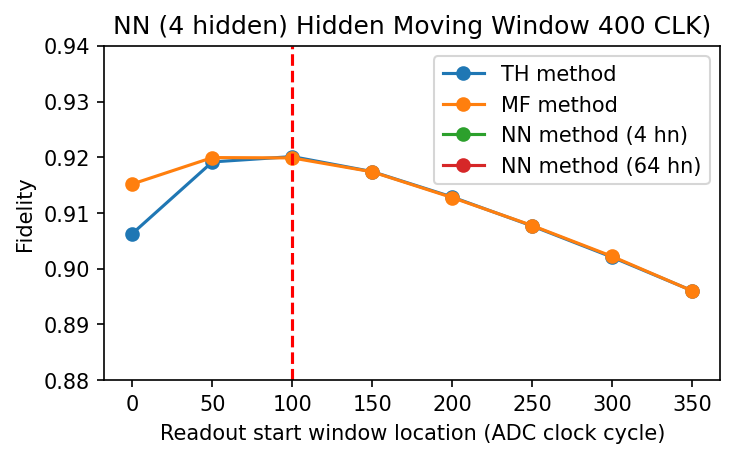

In [78]:
idx = 7

plt.figure(figsize = (5,3), dpi = 150)
plt.plot(readout_loc_list, fidelity_th[idx], 'o-', color = 'C0', label = 'TH method')
plt.plot(readout_loc_list, fidelity_mf[idx], 'o-', color = 'C1', label = 'MF method')
plt.plot(readout_loc_list, fidelity_nn4[idx].reshape(-1), 'o-', color = 'C2', label = 'NN method (4 hn)')
plt.plot(readout_loc_list, fidelity_nn64[idx].reshape(-1), 'o-', color = 'C3', label = 'NN method (64 hn)')
plt.axvline(100, ls = '--', color = 'red')
# plt.plot([100], [0.91462], '*', color = 'C4', markersize=10, label = 'NN method')


# plt.legend(loc = 'upper right')
plt.legend()
# legend(loc = (1.1,.3))
plt.ylim(0.88,0.94)
plt.xlabel('Readout start window location (ADC clock cycle)')
plt.ylabel('Fidelity')
plt.tight_layout()

# if save_plots: plt.savefig('../paper_plots/fidelity_vs_window_opt.pdf')
# if save_plots: plt.savefig('../paper_plots/fidelity_vs_window_opt.png')

plt.title('NN (4 hidden) Hidden Moving Window 400 CLK)')

In [79]:
0.5+(fidelity_mf[idx]*0.5)

array([0.95761, 0.95998, 0.95995, 0.9587 , 0.95639, 0.95388, 0.95111,
       0.94802])

Text(0.5, 1.0, 'NN (4 hidden) Hidden Moving Window 400 CLK)')

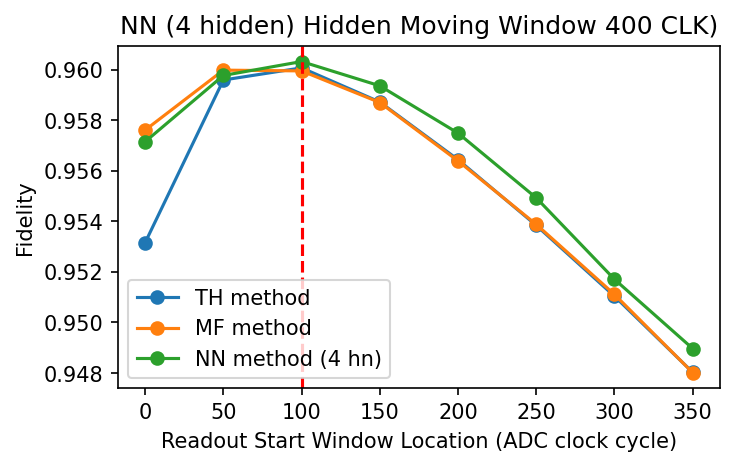

In [95]:
idx = 7

plt.figure(figsize = (5,3), dpi = 150)
plt.plot(readout_loc_list, 0.5+(fidelity_th[idx]*0.5), 'o-', color = 'C0', label = 'TH method')
plt.plot(readout_loc_list, 0.5+(fidelity_mf[idx]*0.5), 'o-', color = 'C1', label = 'MF method')
plt.plot(readout_loc_list, fidelity_nn4[idx].reshape(-1), 'o-', color = 'C2', label = 'NN method (4 hn)')
plt.axvline(100, ls = '--', color = 'red')

# plt.legend(loc = 'upper right')
plt.legend()
# plt.ylim(0.88,0.94)
plt.xlabel('Readout Start Window Location (ADC clock cycle)')
plt.ylabel('Fidelity')
plt.tight_layout()

if save_plots: plt.savefig('../paper_plots/fidelity_vs_window_opt.pdf')
if save_plots: plt.savefig('../paper_plots/fidelity_vs_window_opt.png')

plt.title('NN (4 hidden) Hidden Moving Window 400 CLK)')

Text(0.5, 1.0, 'NN (4 hidden) Hidden Moving Window 400 CLK)')

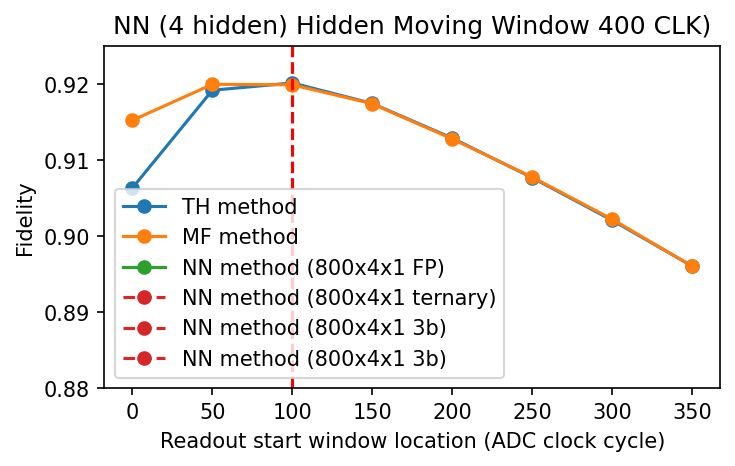

In [81]:
idx = 7

plt.figure(figsize = (5,3), dpi = 150)
plt.plot(readout_loc_list, fidelity_th[idx], 'o-', color = 'C0', label = 'TH method')
plt.plot(readout_loc_list, fidelity_mf[idx], 'o-', color = 'C1', label = 'MF method')
plt.plot(readout_loc_list, fidelity_nn4[idx].reshape(-1), 'o-', color = 'C2', label = 'NN method (800x4x1 FP)')
plt.plot(readout_loc_list, fidelity_800x4x1_ternary[idx].reshape(-1), 'o--', color = 'C3', label = 'NN method (800x4x1 ternary)')
plt.plot(readout_loc_list, fidelity_800x4x1_3b[idx].reshape(-1), 'o--', color = 'C3', label = 'NN method (800x4x1 3b)')
plt.plot(readout_loc_list, fidelity_800x4x1_6b[idx].reshape(-1), 'o--', color = 'C3', label = 'NN method (800x4x1 3b)')
# plt.plot(readout_loc_list, fidelity_nn64[idx].reshape(-1), 'o-', color = 'C3', label = 'NN method (64 hn)')
plt.axvline(100, ls = '--', color = 'red')
# plt.plot([100], [0.91462], '*', color = 'C4', markersize=10, label = 'NN method')


# plt.legend(loc = 'upper right')
plt.legend()
# legend(loc = (1.1,.3))
plt.ylim(0.88,0.925)
plt.xlabel('Readout start window location (ADC clock cycle)')
plt.ylabel('Fidelity')
plt.tight_layout()

# if save_plots: plt.savefig('../paper_plots/fidelity_vs_window_opt.pdf')
# if save_plots: plt.savefig('../paper_plots/fidelity_vs_window_opt.png')

plt.title('NN (4 hidden) Hidden Moving Window 400 CLK)')

Text(0, 0.5, 'Flidelity')

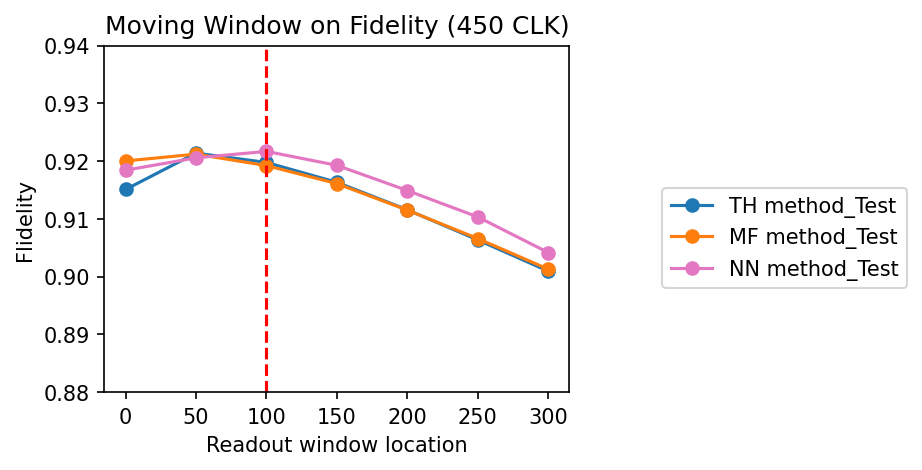

In [82]:
idx = 8

plt.figure(figsize = (4,3), dpi = 150)
# plot(readout_loc_list, all_fidelity_train, 'o', color = 'C0',label = 'TH method_Train')
plt.plot(readout_loc_list, fidelity_th[idx], 'o-', color = 'C0', label = 'TH method_Test')
# plot(readout_loc_list, all_fidelity_MF_train, 'o', color = 'C1', label = 'MF method_Train')
plt.plot(readout_loc_list, fidelity_mf[idx], 'o-', color = 'C1', label = 'MF method_Test')
# plot(readout_loc_list, np.array(ml_accuracy)*2-1, 'o-', color = 'C2', label = 'Large NN method')
# plot(readout_loc_list, fidelity_nn64[idx], 'o-', color = 'C4', label = 'NN (64>2) method_Test')
plt.plot(readout_loc_list, fidelity_nn14[idx], 'o-', color = 'C6', label = 'NN method_Test')

plt.title('Moving Window on Fidelity (450 CLK)')

plt.axvline(100, ls = '--', color = 'red')
plt.legend(loc = (1.2,.3))
plt.ylim(0.88,0.94)
plt.xlabel('Readout window location')
plt.ylabel('Flidelity')

In [83]:
# list(map(str, readout_loc_list))

In [96]:
idx = 7 # start location 100 CLK 

print('Length', len(fidelity_800x64x1[idx]))
# \textbf{Col 1} & \textbf{Col 2} & \textbf{Col 3} & \textbf{Col 4} & \textbf{Col 5} & \textbf{Col 6} & \textbf{Col 7} & \textbf{Col 8} & \textbf{Col 9}  \\ \hline

print("\\textbf{Start Location (CLK)} & ", " & ".join(f"\\textbf{{{sl}}}" for sl in readout_loc_list), "\\\ \hline")
# print("\\textbf{Model} & ", " & ".join(f"\\textbf{{sl}}" sl for sl in readout_loc_list))
print("800x64x1 (32FP) & ", " & ".join(f"{x:.4f}" for x in fidelity_800x64x1[idx]), "\\\ \hline")
print("800x4x1 (32FP) & ", " & ".join(f"{x:.4f}" for x in fidelity_nn4[idx]), "\\\ \hline")
print("800x4x1 (6b) & ", " & ".join(f"{x:.4f}" for x in fidelity_800x4x1_6b[idx]), "\\\ \hline")
print("800x4x1 (3b) & ", " & ".join(f"{x:.4f}" for x in fidelity_800x4x1_3b[idx]), "\\\ \hline")
print("800x4x1 (tern.) & ", " & ".join(f"{x:.4f}" for x in fidelity_800x4x1_ternary[idx]), "\\\ \hline")


Length 8
\textbf{Start Location (CLK)} &  \textbf{0} & \textbf{50} & \textbf{100} & \textbf{150} & \textbf{200} & \textbf{250} & \textbf{300} & \textbf{350} \\ \hline
800x64x1 (32FP) &  0.9571 & 0.9596 & 0.9604 & 0.9593 & 0.9574 & 0.9549 & 0.9517 & 0.9489 \\ \hline
800x4x1 (32FP) &  0.9571 & 0.9598 & 0.9603 & 0.9594 & 0.9575 & 0.9549 & 0.9517 & 0.9490 \\ \hline
800x4x1 (6b) &  0.9567 & 0.9596 & 0.9604 & 0.9593 & 0.9573 & 0.9547 & 0.9518 & 0.9487 \\ \hline
800x4x1 (3b) &  0.9573 & 0.9598 & 0.9603 & 0.9593 & 0.9573 & 0.9548 & 0.9517 & 0.9490 \\ \hline
800x4x1 (tern.) &  0.9567 & 0.9593 & 0.9601 & 0.9590 & 0.9570 & 0.9547 & 0.9516 & 0.9485 \\ \hline


### Fidelity vs Window Size 

In [85]:
import os 
import pickle
import hashlib

import hls4ml 
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, BatchNormalization, Dropout
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
from tensorflow.keras.losses import CategoricalCrossentropy

from tensorflow_model_optimization.python.core.sparsity.keras import prune, pruning_callbacks, pruning_schedule
from tensorflow_model_optimization.sparsity.keras import strip_pruning
import tensorflow_model_optimization as tfmot

from qkeras.qlayers import QDense, QActivation
from qkeras import QBatchNormalization
from qkeras.quantizers import quantized_bits, quantized_relu
from qkeras.utils import _add_supported_quantized_objects
from tensorflow.keras.models import load_model
from qkeras.utils import _add_supported_quantized_objects

In [86]:
def get_model_800x4x1(input_shape):
    model = Sequential()
    model.add(Dense(
                4, 
                activation=None, 
                name='fc1',
                input_shape=(input_shape,)
    ))
    model.add(BatchNormalization(name='batchnorm1'))
    model.add(Dense(
                1, 
                activation='sigmoid',
                name='fc2'
    ))
    return model


def get_model(input_shape, hidden=14):
    model = Sequential()
    model.add(QDense(
        hidden, 
        activation='relu', 
        name='fc1',
        input_shape=(input_shape,), 
        kernel_quantizer=quantized_bits(6,0,alpha=1), bias_quantizer=quantized_bits(6,0,alpha=1)
    ))
    model.add(QBatchNormalization(
            name='batchnorm1',
            gamma_quantizer=quantized_bits(6, 0, 1),
            mean_quantizer=quantized_bits(6, 0, 1),
            variance_quantizer=quantized_bits(6, 0, 1),
            beta_quantizer=quantized_bits(6, 0, 1),
    ))
    model.add(
        QDense(2, name='fc2', kernel_quantizer=quantized_bits(6,0,alpha=1), bias_quantizer=quantized_bits(6,0,alpha=1))
    )
    return model


window_sizes = list(range(50, 651, 50))
parameters4 = list()
parameters14 = list()
parameters64 = list()
for window_size in window_sizes:
    model = get_model_800x4x1(window_size*2)
    parameters4.append(model.count_params())
    model = get_model(window_size*2, hidden=14)
    parameters14.append(model.count_params())
    model = get_model(window_size*2, hidden=64)
    parameters64.append(model.count_params())

Text(0, 0.5, 'Fidelity')

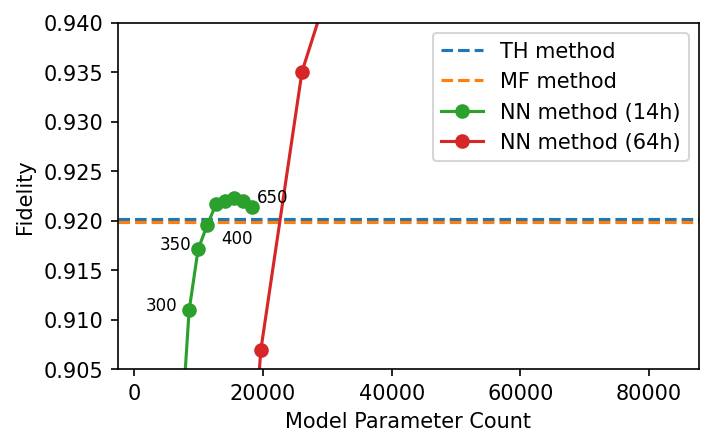

In [87]:
fidelity_nn14

idx = 7 # 400 window size 
jdx = 2 # 100 start location 

plt.figure(figsize = (5,3), dpi = 150)
plt.axhline(fidelity_th[idx,jdx], linestyle='--', color='C0', label='TH method')
plt.axhline(fidelity_mf[idx,jdx], linestyle='--', color='C1', label='MF method')
plt.plot(parameters14, fidelity_nn14[:,jdx][:-2], 'o-', color = 'C2', label = 'NN method (14h)')
plt.plot(parameters64, fidelity_nn64[:,jdx][:-2], 'o-', color = 'C3', label = 'NN method (64h)')

fid = fidelity_nn14[:,jdx][:-2]

idx = 5 
params = parameters14[idx] - (parameters14[idx]*0.8)
acc = fid[idx] #+ (fid[idx]*0.01)
plt.annotate(f'{window_sizes[idx]}', (params, acc), size=8)

idx = 6
params = parameters14[idx] - (parameters14[idx]*0.6)
acc = fid[idx] #+ (fid[idx]*0.01)
plt.annotate(f'{window_sizes[idx]}', (params, acc), size=8)

idx = 7
params = parameters14[idx] + (parameters14[idx]*0.2)
acc = fid[idx] - (fid[idx]*0.002)
plt.annotate(f'{window_sizes[idx]}', (params, acc), size=8)

idx = -1
params = parameters14[idx] + (parameters14[idx]*0.04)
acc = fid[idx] + (fid[idx]*0.0005)
plt.annotate(f'{window_sizes[idx]}', (params, acc), size=8)


fid = fidelity_nn64[:,jdx][:-2]

idx = 5
params = parameters64[idx] - (parameters64[idx]*0.17)
acc = fid[idx] #+ (fid[idx]*0.01)
plt.annotate(f'{window_sizes[idx]}', (params, acc), size=8)

idx = 6
params = parameters64[idx] - (parameters64[idx]*0.14)
acc = fid[idx] #+ (fid[idx]*0.01)
plt.annotate(f'{window_sizes[idx]}', (params, acc), size=8)

idx = 7
params = parameters64[idx] + (parameters64[idx]*0.01)
acc = fid[idx] - (fid[idx]*0.003)
plt.annotate(f'{window_sizes[idx]}', (params, acc), size=8)

idx = -1
params = parameters64[idx] - (parameters64[idx]*0.01)
acc = fid[idx] + (fid[idx]*0.001)
plt.annotate(f'{window_sizes[idx]}', (params, acc), size=8)

# fid = fidelity_nn14[:,jdx][:-2]
# acc_shift = 0.002
# param_shift = 0.1

# for idx in range(1, len(window_sizes), 2):
#     acc = fid[idx] + (fid[idx]*acc_shift)
#     params = parameters14[idx] - (parameters14[idx]*param_shift)
#     print(idx, window_sizes[idx], acc, params)
#     if idx == 5:
#         acc = fid[idx] + (fid[idx]*0.003)
#         params = parameters14[idx] - (parameters14[idx]*0.15)
#         plt.annotate(f'{window_sizes[idx]}', (params, acc), size=8)
#     elif idx > 5:
#         acc = fid[idx] + (fid[idx]*0.003)
#         params = parameters14[idx] - (parameters14[idx]*0.01)
#         plt.annotate(f'{window_sizes[idx]}', (params, acc), size=8)
#     else:
#         plt.annotate(f'{window_sizes[idx]}', (params, acc), size=8)
#     # plt.annotate(single_window_size[idx], (acc, params))


plt.legend()
# legend(loc = (1.2,.3))

plt.ylim(0.905,0.94)
# xlim(5e3,19e3)

plt.xlabel('Model Parameter Count')
ylabel('Fidelity')

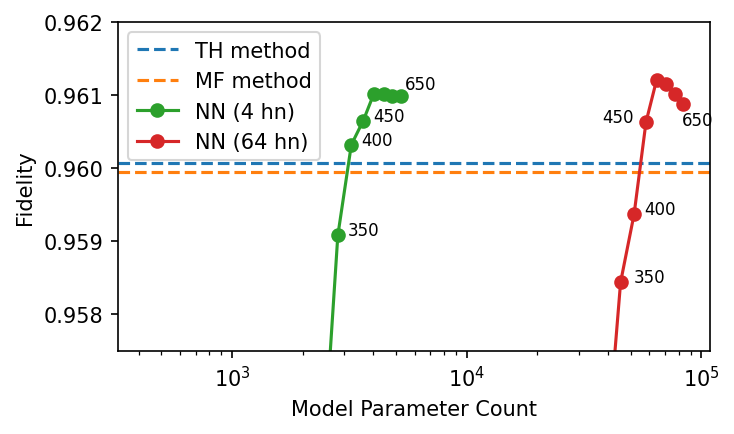

In [88]:
idx = 7 # 400 window size 
jdx = 2 # 100 start location 

plt.figure(figsize = (5,3), dpi = 150)
plt.axhline(0.5+(fidelity_th[idx,jdx]*0.5), linestyle='--', color='C0', label='TH method')
plt.axhline(0.5+(fidelity_mf[idx,jdx]*0.5), linestyle='--', color='C1', label='MF method')
plt.plot(parameters4, fidelity_nn4[:,jdx][:-2], 'o-', color = 'C2', label = 'NN (4 hn)')
plt.plot(parameters64, fidelity_nn64[:,jdx][:-2], 'o-', color = 'C3', label = 'NN (64 hn)')

fid = fidelity_nn4[:,jdx][:-2]

idx = 5
params = parameters4[idx] #+ (parameters4[idx]*10)
acc = fid[idx] #+ (fid[idx]*0.01)
plt.annotate(f'{window_sizes[idx]}', (params, acc), size=8)

idx = 6
params = parameters4[idx] + (parameters4[idx]*0.1)
acc = fid[idx] #+ (fid[idx]*0.01)
plt.annotate(f'{window_sizes[idx]}', (params, acc), size=8)

idx = 7
params = parameters4[idx] + (parameters4[idx]*0.1)
acc = fid[idx] #- (fid[idx]*0.0001)
plt.annotate(f'{window_sizes[idx]}', (params, acc), size=8)

idx = 8
params = parameters4[idx] + (parameters4[idx]*0.1)
acc = fid[idx] #- (fid[idx]*0.0003)
plt.annotate(f'{window_sizes[idx]}', (params, acc), size=8)

idx = -1
params = parameters4[idx] + (parameters4[idx]*0.04)
acc = fid[idx] + (fid[idx]*0.0001)
plt.annotate(f'{window_sizes[idx]}', (params, acc), size=8)


fid = fidelity_nn64[:,jdx][:-2]

idx = 5
params = parameters64[idx] + (parameters64[idx]*0.17)
acc = fid[idx] #+ (fid[idx]*0.01)
plt.annotate(f'{window_sizes[idx]}', (params, acc), size=8)

idx = 6
params = parameters64[idx] + (parameters64[idx]*0.14)
acc = fid[idx] #+ (fid[idx]*0.01)
plt.annotate(f'{window_sizes[idx]}', (params, acc), size=8)

idx = 7
params = parameters64[idx] + (parameters64[idx]*0.1)
acc = fid[idx] #- (fid[idx]*0.003)
plt.annotate(f'{window_sizes[idx]}', (params, acc), size=8)

idx = 8
params = parameters64[idx] - (parameters64[idx]*0.35)
acc = fid[idx] #- (fid[idx]*0.003)
plt.annotate(f'{window_sizes[idx]}', (params, acc), size=8)

idx = -1
params = parameters64[idx] - (parameters64[idx]*0.01)
acc = fid[idx] - (fid[idx]*0.0003)
plt.annotate(f'{window_sizes[idx]}', (params, acc), size=8)


plt.legend()
plt.ylim(0.9575,0.962)
plt.xscale('log')
# plt.ylim(0.915,0.924)
plt.xlabel('Model Parameter Count')
plt.ylabel('Fidelity')
plt.tight_layout()

if save_plots: plt.savefig('../paper_plots/dse_fidelity_vs_param_count.png')
if save_plots: plt.savefig('../paper_plots/dse_fidelity_vs_param_count.pdf')

### HLS Model Figure 

In [89]:
import hls4ml
from qkeras.qlayers import QDense
from qkeras import QBatchNormalization
from qkeras.quantizers import quantized_bits, ternary
from tensorflow.keras.models import Sequential

In [90]:
model = Sequential()
model.add(QDense(
    4, 
    activation=None, 
    name='fc1',
    input_shape=(800,), 
    kernel_quantizer=ternary(),
    bias_quantizer=ternary(),
    # kernel_quantizer=quantized_bits(6,0,alpha=1),
    # bias_quantizer=quantized_bits(6,0,alpha=1)
))
model.add(BatchNormalization(name='batchnorm1'))
# model.add(QBatchNormalization(
#         name='batchnorm1',
#         gamma_quantizer=quantized_bits(6, 0, 1),
#         mean_quantizer=quantized_bits(6, 0, 1),
#         variance_quantizer=quantized_bits(6, 0, 1),
#         beta_quantizer=quantized_bits(6, 0, 1),
# ))
model.add(
    QDense(
        1, 
        name='fc2', 
        activation='sigmoid',
        kernel_quantizer=ternary(),
        bias_quantizer=ternary(),
        # kernel_quantizer=quantized_bits(6,0,alpha=1), 
        # bias_quantizer=quantized_bits(6,0,alpha=1)
))

tmp_model = get_model_800x4x1(800)
tmp_model.save('tmp/model.keras')

# assert model.count_params() == 595597, 'Error. Total parameters has changed.'

In [91]:
hls_config = {}
hls_config['Model'] = {}
hls_config['Model']['Precision'] = 'ap_fixed<16,6>'  # Default precision
hls_config['Model']['ReuseFactor'] = 64  # fully parallelized 
hls_config['Model']['Strategy'] = 'Resource'

hls_config['LayerName'] = {}
keras_layers = ['fc1', 'fc1_relu', 'batchnorm1', 'fc2', 'fc2_linear']
for layer in keras_layers:
    hls_config['LayerName'][layer] = {}
    hls_config['LayerName'][layer]['Precision'] = {}
    hls_config['LayerName'][layer]['Trace'] = True

# Input - ZCU216 uses 14-bit ADCS 
hls_config['LayerName']['fc1_input'] = {}
hls_config['LayerName']['fc1_input']['Precision'] = {}
hls_config['LayerName']['fc1_input']['Trace'] = False
hls_config['LayerName']['fc1_input']['Precision'] = 'ap_fixed<14,14>' 
# Fc1
hls_config['LayerName']['fc1']['Precision']['result'] = 'ap_fixed<20,20>'
hls_config['LayerName']['fc1']['accum_t'] = 'ap_fixed<20,20>'
# Fc1 relu
# hls_config['LayerName']['fc1_relu']['Precision']['result'] = 'ap_fixed<17,17>'

# Batchnormalization
hls_config['LayerName']['batchnorm1']['Precision']['scale'] = 'ap_fixed<24,4>'
hls_config['LayerName']['batchnorm1']['Precision']['bias'] = 'ap_fixed<24,4>'
hls_config['LayerName']['batchnorm1']['Precision']['result'] = 'ap_fixed<24,4>'
hls_config['LayerName']['batchnorm1']['accum_t'] = 'ap_fixed<21,4>'

# Fc2
hls_config['LayerName']['fc2']['Precision']['result'] = 'ap_fixed<21,21>'
hls_config['LayerName']['fc2']['accum_t'] = 'ap_fixed<21,21>'

# Fc2
hls_config['LayerName']['fc2_linear']['Precision']['result'] = 'ap_fixed<8,5>'

In [92]:
save_plots = True

In [93]:
OutputDir = 'tmp/'
XilinxPart = 'xczu49dr-ffvf1760-2-e'
IOType = 'io_parallel'
ClockPeriod = 3.225  # 3.225ns (307.2 MHz)
HLSFig = OutputDir+'model.png'

hls_model = hls4ml.converters.convert_from_keras_model(
    model=model,
    hls_config=hls_config,
    output_dir=OutputDir,
    part=XilinxPart,
    io_type=IOType,
    clock_period=ClockPeriod,
)

print(f"Creating hls4ml project directory {OutputDir}")
hls_model.compile()  # Must compile for C Sim. 

# Visualize model
if save_plots: hls4ml.utils.plot_model(hls_model, show_shapes=True, show_precision=True, to_file=HLSFig)

Interpreting Sequential
Topology:
Layer name: fc1_input, layer type: InputLayer, input shapes: [[None, 800]], output shape: [None, 800]
Layer name: fc1, layer type: QDense, input shapes: [[None, 800]], output shape: [None, 4]
Layer name: batchnorm1, layer type: BatchNormalization, input shapes: [[None, 4]], output shape: [None, 4]
Layer name: fc2, layer type: QDense, input shapes: [[None, 4]], output shape: [None, 1]
Creating HLS model
Creating hls4ml project directory tmp/
Writing HLS project


Done


In [94]:
# if save_plots: hls4ml.utils.plot_model(hls_model, show_shapes=True, show_layer_names=True, show_precision=True, to_file='../paper_plots/2_layer_NN_800.png')
# if save_plots: hls4ml.utils.plot_model(hls_model, show_shapes=True, show_layer_names=True, show_precision=True, to_file='../paper_plots/2_layer_NN_800.pdf')

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, BatchNormalization

2024-11-26 12:53:22.452090: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-26 12:53:23.864839: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-26 12:53:24.336352: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-11-26 12:53:24.336393: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudar

In [2]:
model = Sequential()
model.add(Input(shape=(800,), name='input')) 
model.add(Dense(
    4, 
    activation=None, 
    name='fc1',
    use_bias=True,
))
model.add(BatchNormalization(name='batchnorm1'))
model.add(
    Dense(
        1, 
        name='output', 
        use_bias=True,
        activation='sigmoid',
))

model.save('model.keras')


2024-11-26 12:53:38.811626: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2024-11-26 12:53:38.818714: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2024-11-26 12:53:38.818745: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (correlator7.fnal.gov): /proc/driver/nvidia/version does not exist
2024-11-26 12:53:38.847375: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
